**Setting the working directory**

In [1]:
import os
os.chdir('/Users/shovonsengupta/Desktop/Python/Notebook')

In [2]:
!pwd

/Users/shovonsengupta/Desktop/Python/Notebook


In [3]:
# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

**Multi-class Classification Model using Keras**

**Get the relevant Packages**

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.optimizers import Adam

In [6]:
from keras.callbacks import CSVLogger,ModelCheckpoint
csv_logger = CSVLogger('mlevel_logfile.log', append=True, separator=';')

**Dataset**

In [7]:
digits = load_digits()
X = digits.data
y = digits.target


Printing first digit


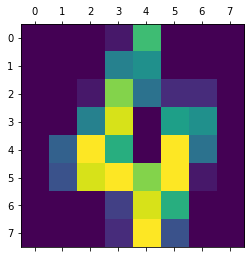

In [9]:
print ("\nPrinting fourth digit")
plt.matshow(digits.images[4])
plt.show()

In [10]:
input_dim = 64
num_classes = 10

**Scaling**

In [11]:
x_vars_stdscle = StandardScaler().fit_transform(X)
y_ = np.zeros((np.shape(y)[0],num_classes))
y_[np.arange(np.shape(y)[0]),y]=1
x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle,y_,train_size = 0.7,random_state=42)

**Build the Network**

In [12]:
def DNN_Multi_Classification_KS(_input_dim):
    # Layer 1
    model = Sequential()
    model.add(Dense(10,input_shape=(_input_dim,)))
    model.add(Activation('relu'))
    # Layer 2
    model.add(Dense(10))
    model.add(Activation('relu'))
    # Layer 3
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))

    adam_opt = Adam(lr=0.01)
    # Model compilation
    model.compile(loss='categorical_crossentropy',optimizer=adam_opt)

    return model

In [15]:
model = DNN_Multi_Classification_KS(input_dim)
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                650       
_________________________________________________________________
activation (Activation)      (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 870
Trainable params: 870
Non-trainable params: 0
__________________________________________________________

**Train the Model**

In [16]:
training_epochs = 50
batch_size = 30

In [17]:
# saving model at each iteration and logging the loss into logger on runtime using list
file_name = 'weights-improvement-{epoch:02d}.hdf5'
checkpoint = ModelCheckpoint(file_name, monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint, csv_logger]

In [18]:
multi_class_model = DNN_Multi_Classification_KS(input_dim)
multi_class_model.fit(x_train,y_train,batch_size=batch_size,
                      epochs=training_epochs,verbose=2,validation_split=0.1,callbacks=callbacks_list)

Epoch 1/50

Epoch 00001: loss improved from inf to 1.72985, saving model to weights-improvement-01.hdf5
38/38 - 0s - loss: 1.7298 - val_loss: 1.2738
Epoch 2/50

Epoch 00002: loss improved from 1.72985 to 0.79467, saving model to weights-improvement-02.hdf5
38/38 - 0s - loss: 0.7947 - val_loss: 0.7201
Epoch 3/50

Epoch 00003: loss improved from 0.79467 to 0.39966, saving model to weights-improvement-03.hdf5
38/38 - 0s - loss: 0.3997 - val_loss: 0.4031
Epoch 4/50

Epoch 00004: loss improved from 0.39966 to 0.22522, saving model to weights-improvement-04.hdf5
38/38 - 0s - loss: 0.2252 - val_loss: 0.4989
Epoch 5/50

Epoch 00005: loss improved from 0.22522 to 0.15764, saving model to weights-improvement-05.hdf5
38/38 - 0s - loss: 0.1576 - val_loss: 0.4595
Epoch 6/50

Epoch 00006: loss improved from 0.15764 to 0.11062, saving model to weights-improvement-06.hdf5
38/38 - 0s - loss: 0.1106 - val_loss: 0.3925
Epoch 7/50

Epoch 00007: loss improved from 0.11062 to 0.07864, saving model to weight

In [20]:
y_train_pred = multi_class_model.predict_classes(x_train)
y_test_pred = multi_class_model.predict_classes(x_test)

y_train_cls = np.argmax(y_train,axis=1)
y_test_cls = np.argmax(y_test,axis=1)

In [21]:
print("Multi Classification Train Confusion matrix :\n",
      confusion_matrix(y_train_cls,y_train_pred))
print("Multi Classification Test Confusion matrix :\n",
      confusion_matrix(y_test_cls,y_test_pred))

Multi Classification Train Confusion matrix :
 [[125   0   0   0   0   0   0   0   0   0]
 [  0 129   1   0   0   0   0   0   0   2]
 [  0   1 129   0   0   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   0   0]
 [  0   1   0   0 119   0   0   0   0   1]
 [  0   0   0   0   0 116   0   0   0   0]
 [  0   0   0   0   0   0 127   0   1   0]
 [  0   0   0   0   0   0   0 124   0   0]
 [  0   0   0   0   0   0   0   0 131   0]
 [  0   0   0   0   0   0   0   0   0 121]]
Multi Classification Test Confusion matrix :
 [[51  0  0  0  0  0  0  0  1  1]
 [ 0 43  1  0  2  0  0  0  2  2]
 [ 0  0 44  2  0  0  0  0  1  0]
 [ 0  0  2 50  0  1  0  0  1  0]
 [ 0  0  0  0 59  0  0  1  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [ 0  0  0  0  0  1 52  0  0  0]
 [ 0  0  0  0  1  0  0 53  0  1]
 [ 1  2  1  1  0  1  0  0 36  1]
 [ 0  1  0  1  0  0  0  0  1 56]]


In [22]:
print("Multi Classification Train Accuracy : ",
      round(accuracy_score(y_train_cls,y_train_pred),4))
print("Multi Classification Test Accuracy : ",
      round(accuracy_score(y_test_cls,y_test_pred),4))

Multi Classification Train Accuracy :  0.9944
Multi Classification Test Accuracy :  0.9389


**An Example of Binary Classification Model**

In [24]:
!pwd

/Users/shovonsengupta/Desktop/Python/Notebook


In [23]:
# Packages/libraries
import pandas as pd
from numpy import expand_dims
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

from keras.layers import Dense,Activation
from keras.models import Sequential
from keras.optimizers import Adam

**Dataset**

In [25]:
data_path = '/Users/shovonsengupta/Desktop/Python/Notebook/PayPal_all/'
credit_data = pd.read_csv(data_path+"credit_data.csv")
credit_data['class'] = credit_data['class']-1

In [26]:
credit_data.shape

(1007, 21)

In [28]:
credit_data['class'].value_counts()/len(credit_data)

0    0.707051
1    0.292949
Name: class, dtype: float64

**Pre-processing**

In [29]:
dummy_stseca = pd.get_dummies(credit_data['Status_of_existing_checking_account'], prefix='status_exs_accnt')
dummy_ch = pd.get_dummies(credit_data['Credit_history'], prefix='cred_hist')
dummy_purpose = pd.get_dummies(credit_data['Purpose'], prefix='purpose')
dummy_savacc = pd.get_dummies(credit_data['Savings_Account'], prefix='sav_acc')
dummy_presc = pd.get_dummies(credit_data['Present_Employment_since'], prefix='pre_emp_snc')
dummy_perssx = pd.get_dummies(credit_data['Personal_status_and_sex'], prefix='per_stat_sx')
dummy_othdts = pd.get_dummies(credit_data['Other_debtors'], prefix='oth_debtors')
dummy_property = pd.get_dummies(credit_data['Property'], prefix='property')
dummy_othinstpln = pd.get_dummies(credit_data['Other_installment_plans'], prefix='oth_inst_pln')
dummy_housing = pd.get_dummies(credit_data['Housing'], prefix='housing')
dummy_job = pd.get_dummies(credit_data['Job'], prefix='job')
dummy_telephn = pd.get_dummies(credit_data['Telephone'], prefix='telephn')
dummy_forgnwrkr = pd.get_dummies(credit_data['Foreign_worker'], prefix='forgn_wrkr')

In [30]:
continuous_columns = ['Duration_in_month', 'Credit_amount', 'Installment_rate_in_percentage_of_disposable_income',
                      'Present_residence_since', 'Age_in_years', 'Number_of_existing_credits_at_this_bank',
                      'Number_of_People_being_liable_to_provide_maintenance_for']

In [31]:
credit_continuous = credit_data[continuous_columns]

**Scaling**

In [33]:
scaler = MinMaxScaler()
credit_cont_scale = scaler.fit_transform(credit_continuous)
credit_cont_scale_pd = pd.DataFrame(credit_cont_scale)
credit_cont_scale_pd.columns = continuous_columns

In [34]:
credit_cont_scale_pd.head()

,Duration_in_month,Credit_amount,Installment_rate_in_percentage_of_disposable_income,Present_residence_since,Age_in_years,Number_of_existing_credits_at_this_bank,Number_of_People_being_liable_to_provide_maintenance_for
0,0.029412,0.058554,1.000000,1.000000,0.857143,0.333333,0.0
1,0.647059,0.363237,0.333333,0.333333,0.053571,0.000000,0.0
2,0.117647,0.117617,0.333333,0.666667,0.535714,0.000000,1.0
3,0.558824,0.486270,0.333333,1.000000,0.464286,0.000000,1.0
4,0.294118,0.294361,0.666667,1.000000,0.607143,0.333333,1.0


In [35]:
# Concatenating all the variables
credit_data_new = pd.concat([dummy_stseca, dummy_ch, dummy_purpose, dummy_savacc, dummy_presc, dummy_perssx,
                             dummy_othdts, dummy_property, dummy_othinstpln, dummy_housing, dummy_job,
                             dummy_telephn, dummy_forgnwrkr, credit_cont_scale_pd, credit_data['class']], axis=1)

In [36]:
# Need to scale the continuous variables and combine for later processing
df_x_train, df_x_test, y_train_inter, y_test_inter = train_test_split(credit_data_new.drop(['class'], axis=1),
                                                    credit_data_new['class'],train_size=0.7, random_state=42)

In [43]:
x_train = np.array(df_x_train)
x_test = np.array(df_x_test)
y_train = expand_dims(y_train_inter, axis=1)
y_test = expand_dims(y_test_inter, axis=1)

In [44]:
x_train.shape

(704, 61)

In [45]:
type(x_train)

numpy.ndarray

**Build the model**

In [46]:
def DNN_Binary_Classification_KS(_input_dim):
    # Layer 1
    model = Sequential()
    model.add(Dense(10,input_shape=(_input_dim,)))
    model.add(Activation('relu'))
    # Layer 2
    model.add(Dense(10))
    model.add(Activation('relu'))
    # Layer 3
    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    adam_opt = Adam(lr=0.01)
    # Model compilation
    model.compile(loss='binary_crossentropy',optimizer=adam_opt)

    return model

**Model Training**

In [47]:
# Model training
input_dim = 61
training_epochs = 50
batch_size = 30

In [48]:
bin_class_model = DNN_Binary_Classification_KS(input_dim)
bin_class_model.fit(x_train,y_train,batch_size=batch_size,epochs=training_epochs)

Epoch 1/50
24/24 [==============================] - 0s 980us/step - loss: 0.6243
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5321
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4831
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4607
Epoch 5/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4148
Epoch 6/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3861
Epoch 7/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3366
Epoch 8/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3263
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3172
Epoch 10/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2807
Epoch 11/50
24/24 [==============================] - 0s 978us/step - loss: 0.2491
Epoch 12/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2457
Epoch 13/50
24/24 [==========================

In [49]:
y_train_pred = bin_class_model.predict_classes(x_train)
y_test_pred = bin_class_model.predict_classes(x_test)

In [50]:
print("Binary Classification Train Confusion matrix :\n",
      confusion_matrix(y_train,y_train_pred))
print("Binary Classification Test Confusion matrix :\n",
      confusion_matrix(y_test,y_test_pred))

Binary Classification Train Confusion matrix :
 [[495   6]
 [  6 197]]
Binary Classification Test Confusion matrix :
 [[193  18]
 [ 32  60]]


In [51]:
print("Binary Classification Train Accuracy : ",
      round(accuracy_score(y_train,y_train_pred),4))
print("Binary Classification Test Accuracy : ",
      round(accuracy_score(y_test,y_test_pred),4))

Binary Classification Train Accuracy :  0.983
Binary Classification Test Accuracy :  0.835
